In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Gantilah 'nama_file.csv' dengan nama file sebenarnya dan sesuaikan path jika diperlukan
path_file = ('/content/gdrive/MyDrive/Machine Learning/Dataset/Salary_Data.csv')

# Membaca dataset menjadi DataFrame
df = pd.read_csv(path_file)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# Check if the dataframe is empty
if df.empty:
    print("Error: DataFrame is empty.")
else:
    print("DataFrame information:")
    print(df.info())  # Print information about the DataFrame

    # Check for missing values in the dataframe
    if df.isnull().values.any():
        print("Error: DataFrame contains missing values. Please handle missing values before proceeding.")
    else:
        # Assuming 'Apps' column contains the features
        apps_values = df['Apps'].values

        # Print information about the 'Apps' column
        print("Apps column information:")
        print(f"Shape: {apps_values.shape}")
        print(f"Size: {apps_values.size}")

        # Handle missing values in the data
        # You can choose another strategy like 'mean', 'median', or 'most_frequent' based on your data
        imputer = SimpleImputer(strategy='mean')

        # Reshape the 'Apps' column, considering the appropriate shape based on your data structure
        # Modify the reshape dimensions based on your understanding of the data
        X = imputer.fit_transform(apps_values.reshape(-1, 1))  # Adjust the reshape dimensions as needed

        y = df['Caps'].values

        # Ensure there is at least one sample after imputation
        if X.shape[0] > 0:
            # Modify test_size to a reasonable value
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize LinearSVR model with hyperparameters
            linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

            # Train the model
            linear_svr_model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = linear_svr_model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            print(f'Mean Squared Error: {mse}')

            # Now the LinearSVR model with specified hyperparameters is trained and tested.
            # You can use it to make predictions on new data.
        else:
            print("Error: No samples after imputation.")

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
Error: DataFrame contains missing values. Please handle missing values before proceeding.


In [9]:
df.dropna(inplace=True)  # Menghapus baris yang mengandung NaN
X = df['Years of Experience'].fillna(df['Years of Experience'].median()).values.reshape(-1, 1)

# Pastikan bahwa tipe data dari kolom yang Anda gunakan sesuai dengan ekspektasi model.
df['Years of Experience'] = df['Years of Experience'].astype(float)

In [10]:
# Import library
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model LinearSVR dengan hyperparameter tertentu
linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

# Melatih model
linear_svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = linear_svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2003538381.561104


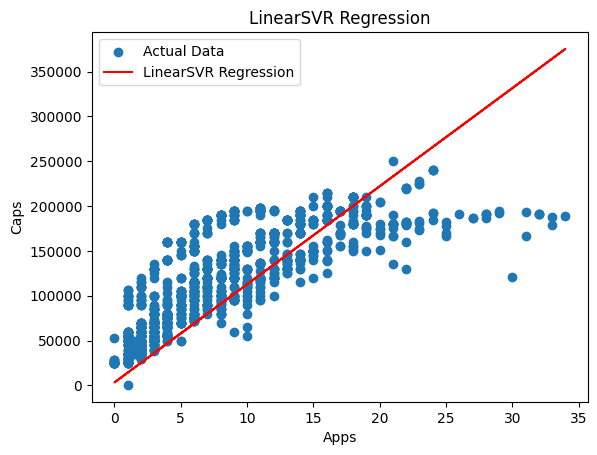

In [11]:
import matplotlib.pyplot as plt

# Ensure df has enough rows
if len(df) < 2:
    print("Error: Not enough data for training and testing sets.")
else:
    # Modify test_size to a reasonable value
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model LinearSVR dengan hyperparameter tertentu
    linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

    # Melatih model
    linear_svr_model.fit(X_train, y_train)

    # Visualisasi data dan model
    plt.scatter(X_test, y_test, label='Actual Data')  # Use X_test and y_test for visualization
    plt.plot(X_test, linear_svr_model.predict(X_test), color='red', label='LinearSVR Regression')

    # Label sumbu
    plt.xlabel('Apps')
    plt.ylabel('Caps')

    # Menambahkan judul
    plt.title('LinearSVR Regression')

    # Menampilkan legenda
    plt.legend()

    # Menampilkan plot
    plt.show()


In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Instantiate your SVR model
svr_model = SVR()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [10, 100, 1000],
    'gamma': [0.5, 0.05, 0.005]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 763133042.0258998


In [13]:
model_baru = SVR(C=10, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=10, gamma=0.005)

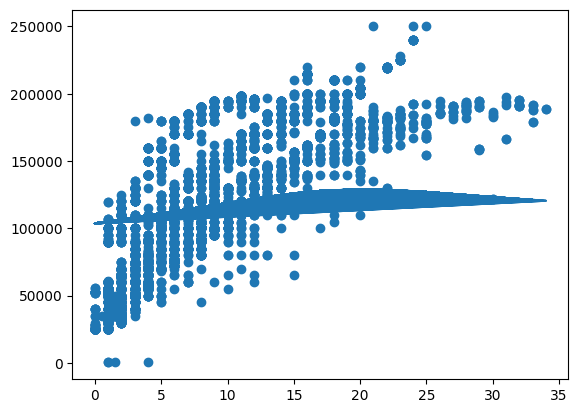

In [14]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))